# Sprint 5: Integrated Project

#### Introduction: 

This project includes one DataFrame containing video game information. Each row represents one video game and includes the name, platfor, year of release, genre, sales in North America, Europe, and Japan, other sales, critic score, user score, and rating. I will first clean the data by correcting column names, filling in missing values, converting data types to ones appropriate for analysis, and adding a new column titled 'total_sales' that combines all initial sales columns.

My next step is to analyze the data in a way that can be used to forecast future sales and create a marketing campaign for the upcoming year 2017. The current dataset contains games released starting in 1980, however, since I will be informing market strategy for the upcoming year, I will be narrowing my scope of interest only to include years relevant to the task at hand.

I will be creating a variety of visuals in order to portray the relation between sales and various other elements of the games including platforms, year of release, genre, critic/user score etc. I will also be carrying out to t-tests to test various hypotheses.

The use of the words 'popularity' or 'top' throughout this analysis equates to profitability.

### Step 1: reading and observing dataset

In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

importing necessary libraries

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


read DataFrame, printed head to get a look at data structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


checking data types and getting a look at which columns contain missing values. I know I will need to convert columns "year_of_release", "critic_score", and "user_score" based off first glace, but I will do more analysis of this in part two.

### Step 2: converting to lowercase, converting data types, and addressing missing values

In [4]:
df.columns = df.columns.str.lower()

converted all columns to lowercase

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


ensuring all columns were converted to lowercase


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


printed info again to view data types. I will deal with missing values before converting datatypes. "name", "year_of_release", "genre", "critic_score", "user_score", and "rating" all contain missing values, but to varying degrees. For example, "name" only contains 2 missing rows while "critic_score" contains 8576 missing values, therefore these columns need to be dealt with differently. I can delete rows where column info is missing twice because it would not greatly impact the DF, however I cannot do the same when over half the values are missing.

I can see how many values are missing from each column by subtracting "non-null" value from 16715 or calling df[column name].isna().sum()

In [7]:
df['name'].isna().sum()

2

In [8]:
df = df.dropna(subset=['name'])

dropping rows where "name" is missing since there is only 2.

In [9]:
df = df.dropna(subset=['genre'])

dropping rows where "genre" is missing since there is only 2.

In [10]:
df['year_of_release'].isna().sum()

269

In [11]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [12]:
df['year_of_release'].isna().sum()

0

There were 269 missing values in the "year_of_release" column. Possible reasons include that year of release was neglected when researching certain games or year was unknown. I decided to fill in missing values with 0. Removing missing values will allow me to convert data types and perform mathematical functions in future steps. If needed, I will omit years where "year_of_release" = 0 when doing further analysis.

In [13]:
df['critic_score'].isna().sum()

8576

There are many reasons values here could be missing. For example, maybe the game wasn't popular enough to be reviewed, it is too newly released to have been reviewed yet, or there was no ratings found for whatever reason. 


The same game can exist on multiple different platforms. Seeing as there are a lot of missing critic scores, I will group by name, take the average critic score for each name and fill in missing critic scores according to their scores on other platforms.

In [14]:
def fill_with_avg(group):
    return group.fillna(group.mean())
                        
df['critic_score'] = df.groupby('name')['critic_score'].transform(fill_with_avg)

In [15]:
df['critic_score'].isna().sum()

7615

Still left with 7615 missing values after filling in "critic_score" with known scores from other platforms.

In [16]:
df['critic_score'] = df['critic_score'].fillna(0)

In [17]:
df['critic_score'].isna().sum()

0

Decided to fill in remaining missing values with 0. This will allow me to convert data type and perfome mathematical operations later on if needed. If so, I will omit critic scores = 0 because this would skew results/analysis.

In [18]:
df['user_score'].isna().sum()

6699

In [19]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


There are quite a few missing values in this row which can be explained by similar reasons as previously discussed columns. (too new of a game to have been reviewed, not very popular of a game therefore it lacks reviews, couldn't find data, or just did not include data for whatever reason). There are also 2424 rows in which "tbd" occurs in the "user_score" column. Once again, this is probably because the game is too new/their arent't enough user reviews yet to include a score/data. In other words, "tbd" is also indicative of missing data.

I will be changing all "tbd" and null values to 0. 



In [20]:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [21]:
df['user_score'] = df['user_score'].fillna(0)

In [22]:
df['user_score'].isna().sum()

0

Took care of missing/"tbd" values by using placeholder 0 so that I am able to convert datatypes and perform mathematical functions when needed. I will omit rows where user_score = 0 when analyzing user score data seeing as I added this information and is therefore not accurate for analysis.

In [23]:
df['rating'].isna().sum()

6764

Missing values can be explained by lack of information available on the game, the fact that it may be too new to have been rated yet, or it is possible that whoever gathered data neglected this particular game. 

In [24]:
df['rating'] = df['rating'].fillna(0)

In [25]:
df['rating'].isna().sum()

0

took care of missing values by replacing them with 0 in order to avoid confusion later on. It also allows us to do exploratory analysis on this data without interference of Nan values.

In [26]:
df.info()
df.sample(15)

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13307,Venus & Braves: Majo to Megami to Horobi no Yogen,PSP,2011.0,Role-Playing,0.00,0.00,0.05,0.00,0.0,0,0
7812,SingStar Pop Vol.2,PS2,2008.0,Misc,0.09,0.07,0.00,0.02,0.0,0,0
16523,Icewind Dale II,PC,2002.0,Role-Playing,0.00,0.01,0.00,0.00,83.0,8.3,T
16210,Football Academy,DS,2009.0,Sports,0.00,0.01,0.00,0.00,0.0,0,0
10271,Mushroom Men: Rise of the Fungi,DS,2008.0,Action,0.10,0.00,0.00,0.01,45.0,7.3,E
8477,World Tour Soccer 2005,PS2,2004.0,Sports,0.08,0.06,0.00,0.02,68.0,9,E
3867,Rune Factory 2: A Fantasy Harvest Moon,DS,2008.0,Role-Playing,0.32,0.03,0.15,0.03,77.0,7.9,E
10294,ATV Quad Kings,DS,2010.0,Racing,0.10,0.00,0.00,0.01,47.0,0,E
2918,NHL 12,X360,2011.0,Sports,0.55,0.10,0.00,0.05,86.0,7,E10+
9051,FIFA Soccer 2005,GC,2004.0,Sports,0.11,0.03,0.00,0.00,78.0,8.5,E


printed info to ensure all missing data was taken care of.

printed a random sample of the data to get another look at it.

I will convert "year_of_release" to a integer type since years are represented in whole numbers. I will also convert "critic_score" to integer type since in both head() and the sample, all critic scores were whole numbers. I will convert "user_score" to float in case mathematics will need to be applied later.

In [27]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [28]:
df['critic_score'] = df['critic_score'].astype(int)

In [29]:
df['user_score'] = df['user_score'].astype(float)

converted to appropriate data types

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


confirmed that data types were converted

In [31]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

added 'total_sales' column by adding all existing sales columns

In [32]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38


checked to ensure column was added

### Step 3

#### Look at how many games were released in different years. Is the data for every period significant?

In [33]:
df_grouped_year = df.groupby('year_of_release')

In [34]:
df_grouped_year['year_of_release'].value_counts()

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64

using "value_counts" we can see how many times each year occurs in the dataset. I will exclude 0 from my analysis since I replaced all Nan values with 0. Here we can see that the first year data was collected 1980, very few games were released. The amount of games released never exceeds 50 in a year until 1993, when 60 games were released, and then the amount more than doubles for the following year. This could be because of rising popularity in video games. Number of games released per year continues to increase each year until 2002. There is not a major difference in the number released per year from years 2002 to 2004. There is a rise in games released from 2005 until 2009, and from there it decreases. There is a substantial drop in year 2012, and it continues to steadily decline.

Although there is a large pool of yearly sales/games released to analyze, my main focus is planning the 2017 campaign. Therefore, sales from 1980 - 2011 are not very relevant for my analysis. Video games and their users' behaviors/useage of video games are constantly changing, therefore I consider data from the last 5 years to be more signicant when planning the marketing campaign.

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

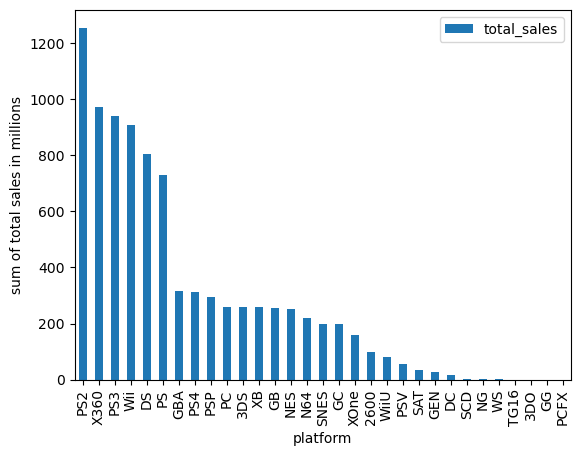

In [35]:
platform_sales = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values('total_sales', ascending=False))
platform_sales.plot(kind='bar', ylabel='sum of total sales in millions', xlabel='platform')
plt.show()

Created a bar graph showing total sales for each platform in the dataset. Sorted the graph in descending order since the focus is on platforms with greatest total sales. Here, I will chose the top 6: PS2, X360, PS3, Wii, DS, and PS. All 6 of these platform have a sum of total sales of around 750 million dollars or more. After these 6, sum of total sales drops drastically to around 375 million dollars or less.

PS2


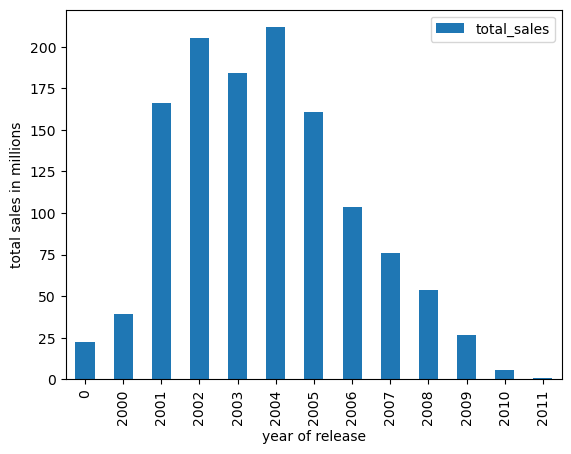

X360


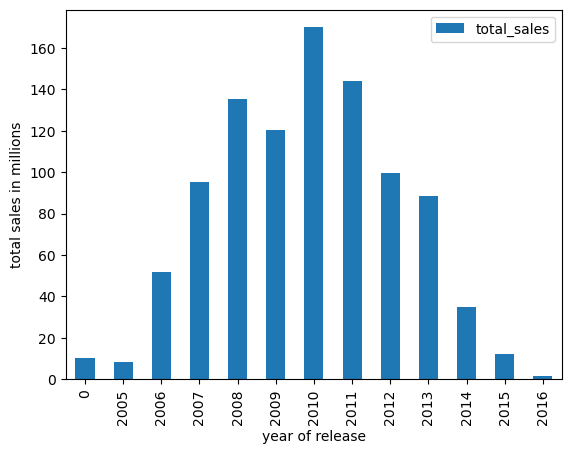

PS3


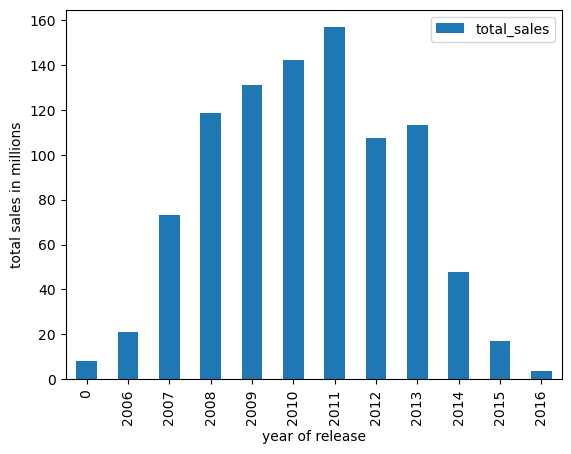

Wii


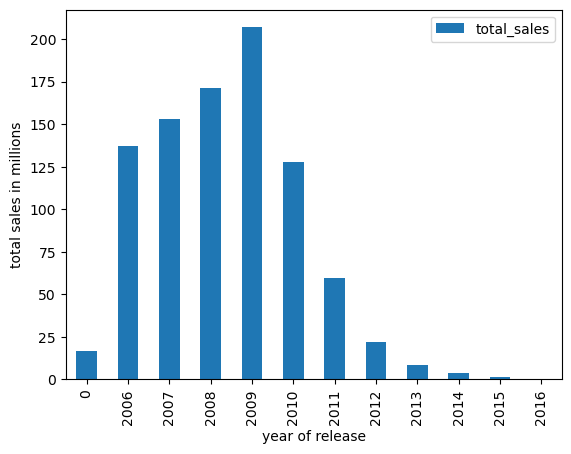

DS


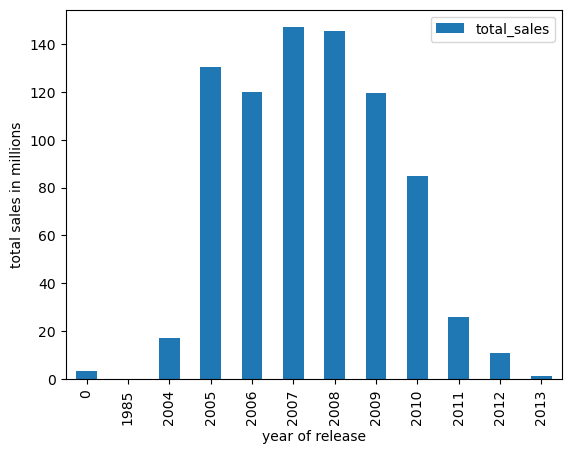

PS


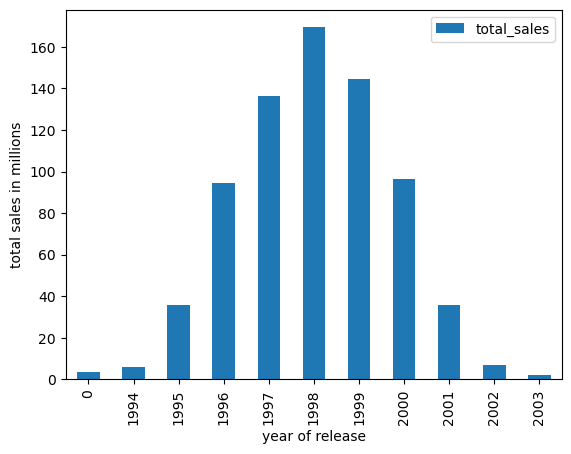

In [36]:
for platform in platform_sales.index[:6]:
    print(platform)
    (df.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', xlabel='year of release', ylabel='total sales in millions'))
    plt.show()

Created a for loop to generate graphs for the 6 highest-grossing platforms, comparing total sales by year. For all graphs, disregard year 0 as it is a placeholder for missing year information. Here, I will be equating total sales to popularity of the platform.

The platform with the highest total sales in PS2. PS2 started to gain popularity in 2000 with a significant jump in sales from year 2000 to 2001. Sales remain fairly steady and high until 2005 where sales start to decline, but still remain fairly high. In 2011, there were close to 0 sales. To conclude, PS2 retained popularity and high sales from 2000/2001 until it reached 0 in 2011 (~10 years).

X360 retained high sales from about 2006 to 2014 and then reached nearly 0 dollars in sales in 2016. Similar to PS2, X360's lifespan starting from rising popularity to nearly 0 sales lasted about 10 years.

PS3 retained high sales from about 2006 with increasing sales until 2011. After this, sales declined. By 2016, sales were nearly 0. This follows the 10-year lifespan pattern from PS2 and X360.

Wii retained high and increasing sales from 2006 until 2009 and then sales started to decline. Sales are very low in 2013, 2014, and 2015, and sales are nearly 0 in 2016, once again following the 10-year lifespan pattern.

DS, though released in 1985, did not retain high sales until 2005-2010 and then sales consequently decline. By 2013 sales are nearly 0. DS had about an 8 year lifespan from the time it appeared as a popular platform unitl reaching 0 sales.

PS started showing relevant sales in 1995, 10 years after being released. Sales increase until their peak in 1998 and retain fairly high sales until 2000. By 2003, sales are close to 0. Similar to DS, PS had about an 8 year lifespan from the time it appeared as a popular platform unitl reaching 0 sales.

To conclude, platforms tend to die off after about 10 years of steady high sales.


#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.

Based on previous review of the data and considering that my goal is to forecast sales/come up with a marketing strategy for 2017, I will only be using data from the past 2 years (2014-2016). Data from years prior to this timeframe are irrelevant for the task at hand seeing as trends in gaming are constantly changing. For exmaple, the sales of a platform in 1980 can't predict much regarding sales of a currently popular platform. Although the average lifespan of a platform from the time it gains popularity/generates high sales is about 8-10 years, even going back that far would be irrelevant for this analysis due to changing trends. We can see above that several platforms that were once very popular and had high sales lost popularity in 2016, so going back more than 2 years could skew data when looking at what platforms are currently popular/generate high sales. Data from years 2014-2016 is manageable and relevant in predicting future sales and leading marketing strategies.

#### Work only with the data that you've decided is relevant. Disregard the data for previous years.

After deciding to only work with data from 2014-2016, I will filter the DF so that I have a new DF including only platforms/games from the time period relevant for analysis.

In [37]:
df_filtered = df[df['year_of_release'] > 2013]
df_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,0,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98


Successfully filitered DF to show games released after 2013. All data analyzed from this point onward will be regarding the time frame 2014-2016.

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

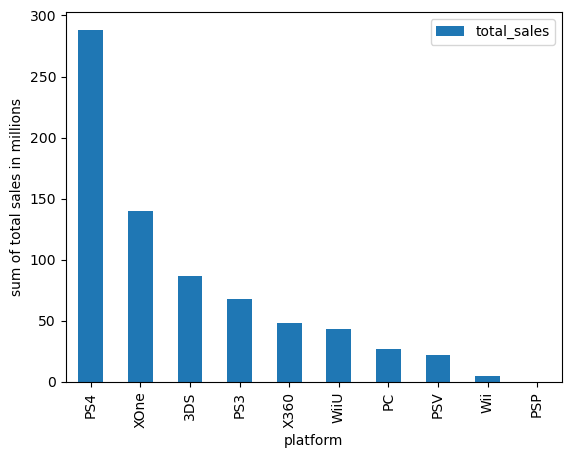

In [38]:
filtered_platform_sales = (df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values('total_sales', ascending=False))
filtered_platform_sales.plot(kind='bar', ylabel='sum of total sales in millions', xlabel='platform')
plt.show()

Created a graph comparing platforms and the sum of their total sales.

PS4 leads in sales, almost doubling the platform with the next highest sales, XOne. 

There are only 10 platforms with games released from 2014-2016 in the dataset. The 6 platforms with the highest sales are PS4, XOne, 3DS, PS3, X360, and WiiU.

PS4


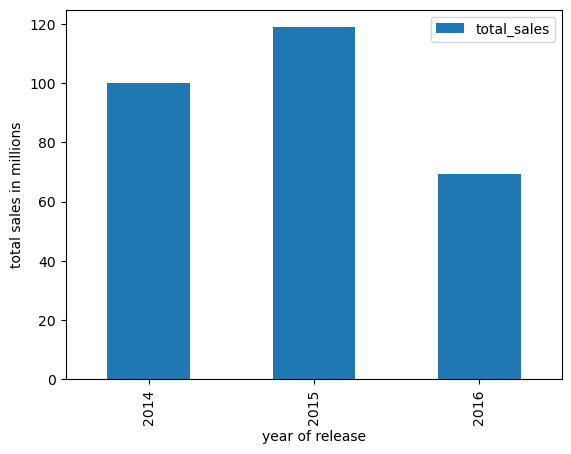

XOne


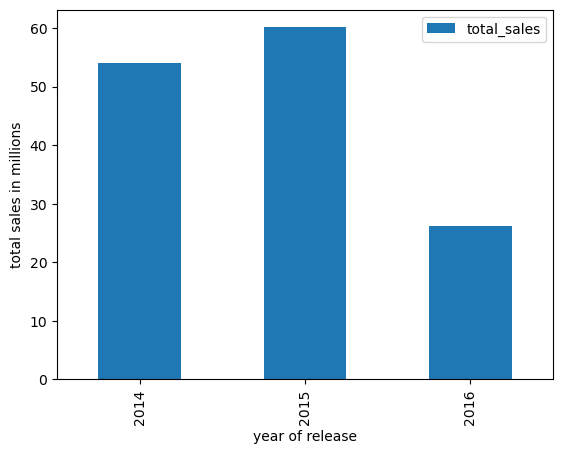

3DS


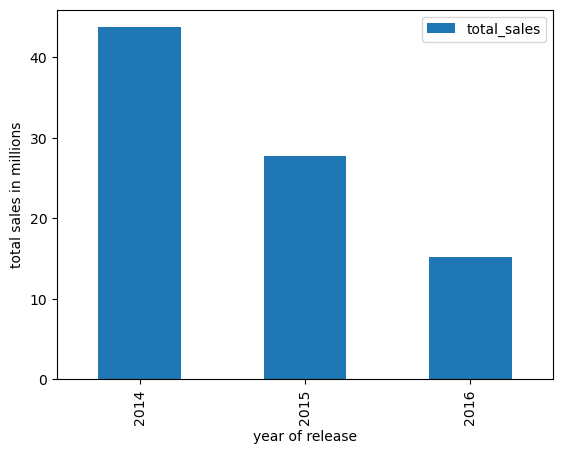

PS3


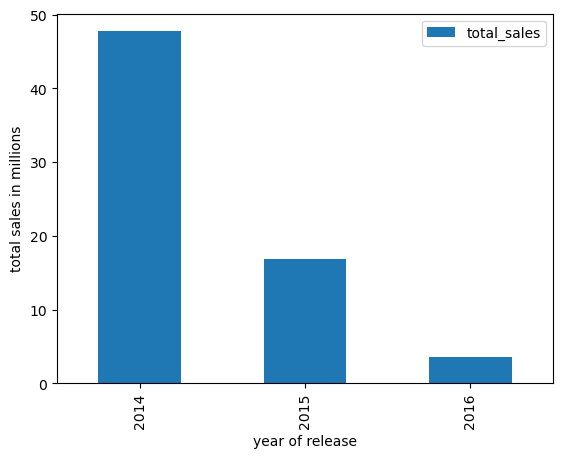

X360


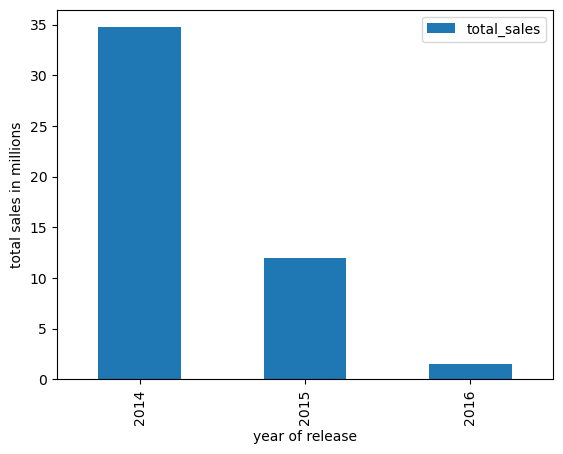

WiiU


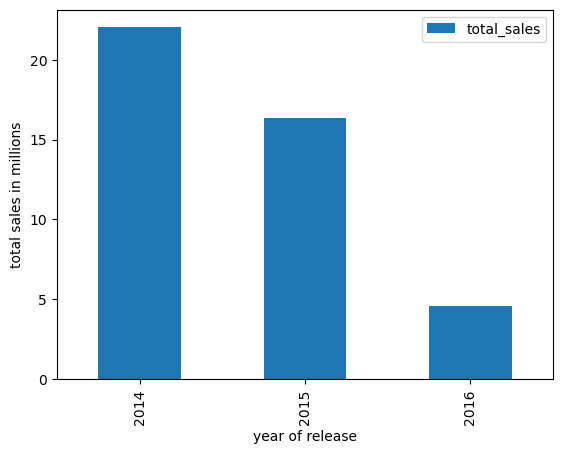

PC


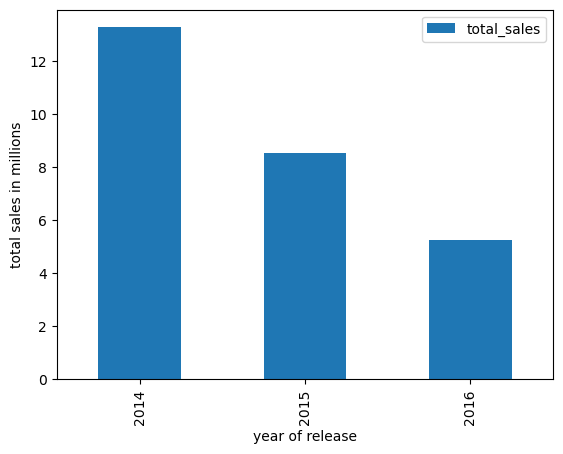

PSV


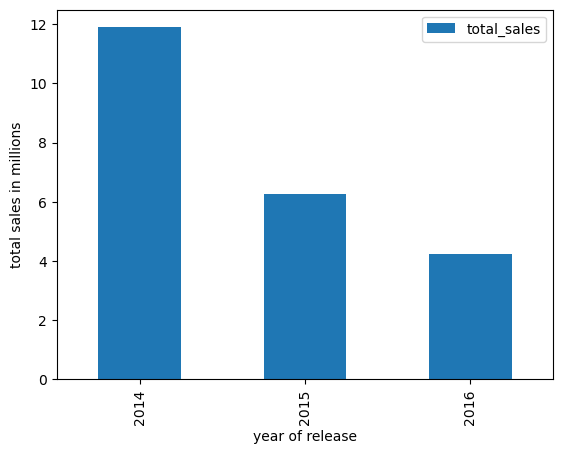

Wii


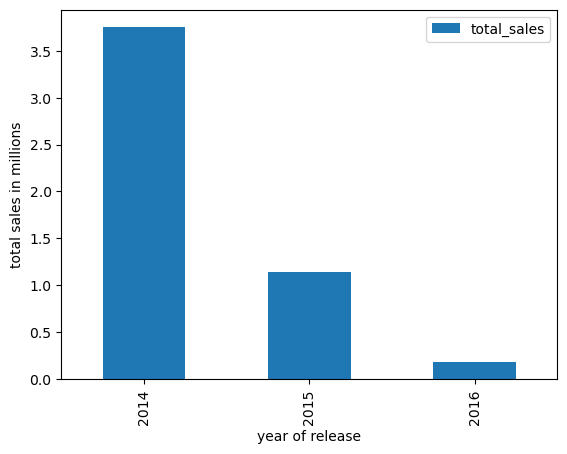

PSP


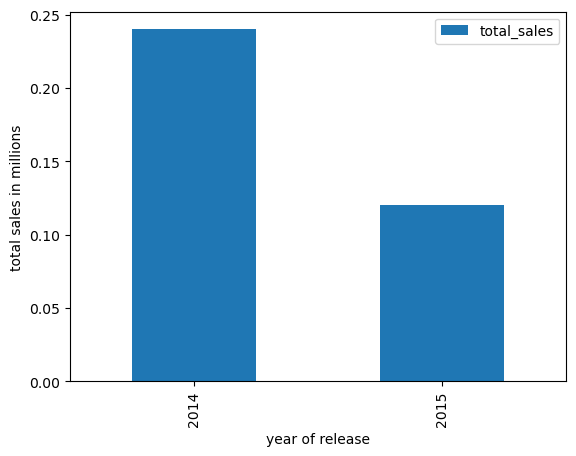

In [39]:
for platform in filtered_platform_sales.index:
    print(platform)
    (df_filtered.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', xlabel='year of release', ylabel='total sales in millions'))
    plt.show()

When analyzing what platforms are growing/shrinking from years 2014-2016, it appears all platforms saw a decrease in sales from 2015 to 2016 and PSP either became obsolete in 2016 or there is no available info regarding 2016 sales. 

However when comparing graphs representing all years in the dataframe to graphs representing sales in just 2014-2016, there is a difference in which platforms had the highest sales then vs. now. For example, PS4, XOne, and 3DS are now the top 3 highest-grossing platforms, all of which were not in the top highest-grossing platforms when looking at all available years. This could represent growth in popularity/sales and potential for profitability even though sales dipped from 2015-2016.

Taking all of this into consideration, I can conclude that platforms with potential to be profitable are PS4, XOne, and 3DS. They all retained sales above ~15 million dollars in 2016 while other platforms did not.

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Text(0.5, 1.0, 'Global Sales by Platform')

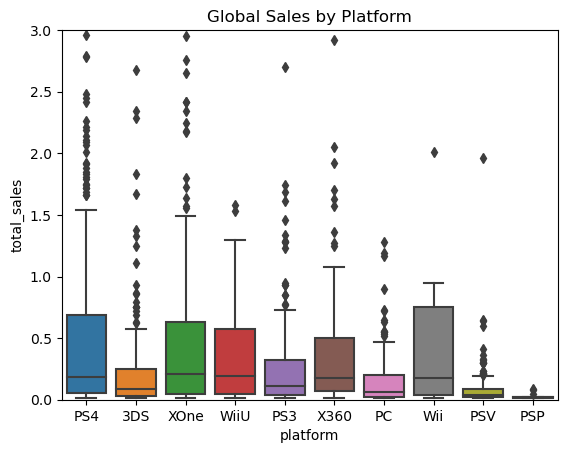

In [131]:
sns.boxplot(data = df_filtered, y = "total_sales", x = "platform")
plt.ylim(0,3)
plt.title('Global Sales by Platform')


Global sales for each platform vary. For each platform the majority if not all of sales per game do not exceed 1 million. However, the extreme differences between the platforms' global sales lie in their outliers. For examlple, PS4 has multiple outliers exceeding 2 million while PSV's outlier do not exceed 2 million. To conclude, global sales among platforms differ greatly with PS4, Wii, and XOne having the highest..

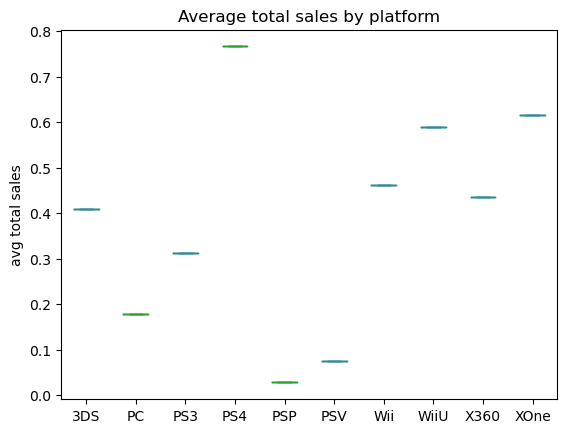

In [41]:
df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='mean').T.plot(kind='box', 
                                        title='Average total sales by platform', ylabel='avg total sales')
plt.show()

I have created both a boxplot and bar graph to compare average total sales by platform. 

The box plot shows a great variation in average total sales by platform with PS4 having the highest totala average sales which relates to all of the data thus far. The majority of platforms fall withing the .3 to .6 million range, however still vary.

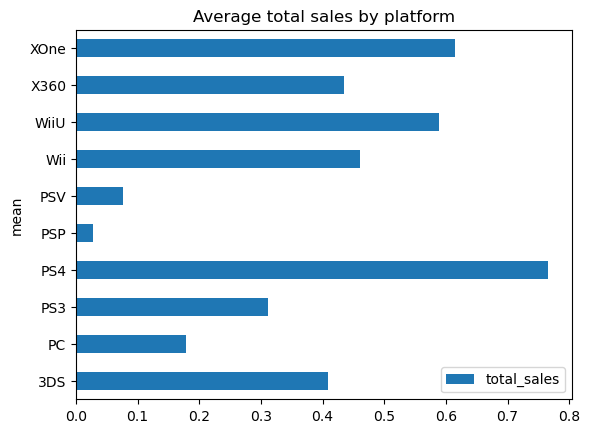

In [42]:
df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='mean').plot(kind='barh', 
                                        title='Average total sales by platform', ylabel='mean')
plt.show()

Once again, we can see that PS4 has the highest avg total sales and PSP has the lowest. Average total sales by platform differ greatly with the greatest difference being around .73 million (PS4 at around .77 minus PSP at around .04 million).

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

I will be looking at how user and critic review affect PS4 sales.

In [43]:
ps4_df = df_filtered[df_filtered['platform']=='PS4']
ps4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


filtered DF to show only rows where platform is PS4

<Axes: title={'center': 'Correlation of user score and total sales for PS4'}, xlabel='total sales in millions', ylabel='user score'>

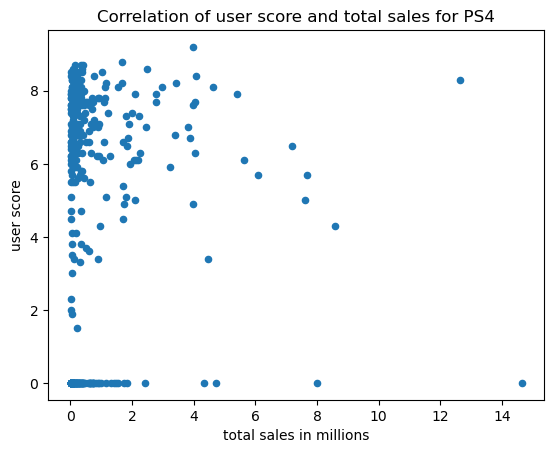

In [44]:
ps4_df.plot(kind='scatter', x='total_sales', y='user_score', xlabel='total sales in millions', ylabel='user score', title='Correlation of user score and total sales for PS4')

Scatter plot showing correlation between user score shows a high concentration of ps4 games with low sales but hgih user scores of around 5.5 to 9. There is also a high concentration with low sales and user scores of 0, this could potentially be due to the fact that Nan values were filled with 0 in order to convert data types and accurately analyze data and therefore these points are irrelevant.

In [45]:
ps4_df['user_score'].corr(df['total_sales'])

0.10144814376783846

correlation coefficient indicates little to linear correlation between user scores and total sales.

<Axes: title={'center': 'Correlation of critic score and total sales for PS4'}, xlabel='total sales in millions', ylabel='critic score'>

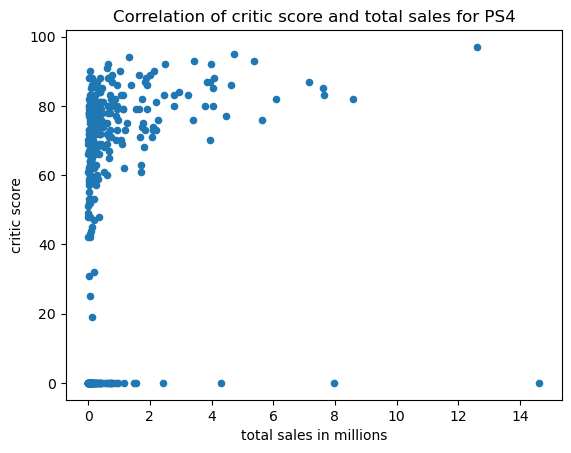

In [46]:
ps4_df.plot(kind='scatter', x='total_sales', y='critic_score', xlabel='total sales in millions', ylabel='critic score', title='Correlation of critic score and total sales for PS4')

Scatter plot showing correlation between critic score shows a high concentration of ps4 games with low sales but medium to high critic scores of around 50 to 90. On average, critic scores were above 40 but for these scores, total sales for these games ranged anywhere from 0 to 12.5 million dollars. 

There is also a high concentration with low sales and critic scores of 0, this could potentially be due to the fact that Nan values were filled with 0 in order to convert data types and accurately analyze data and therefore these points are irrelevant.

In [47]:
ps4_df['critic_score'].corr(df['total_sales'])

0.20724637243557284

correlation coefficient indicates little to linear correlation between critic score and total sales.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [48]:
ps4 = df_filtered[df_filtered['platform']=='PS4']['name'].unique() #checking for unique games there are under the PS4 platform

In [49]:
other_platforms = df_filtered[df_filtered['platform'] != 'PS4']['name'].unique()#checking for unique games there are under all platforms except PS4

In [50]:
overlap = np.intersect1d(ps4, other_platforms) #assigned shared games from PS4 and all other platforms to variable overlap

In [51]:
same_games = df_filtered[df_filtered['name'].isin(overlap)]#creating new DF including only games that exist across PS4 and all other platforms in order to compare sales 
same_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


Successfully filtered df_filtered to find games produced by both PS4 and all other platforms in the dataset in order to compare the same games across all platforms. Filtering data to show games that exist across all platforms will give a more accurate read of the data. For example, maybe one platform had a specialty game that did not exist on the others, and therefore it could skew data one way or another. By looking at only games that exist across all platforms, we can better compare the success/popularity of each platform.

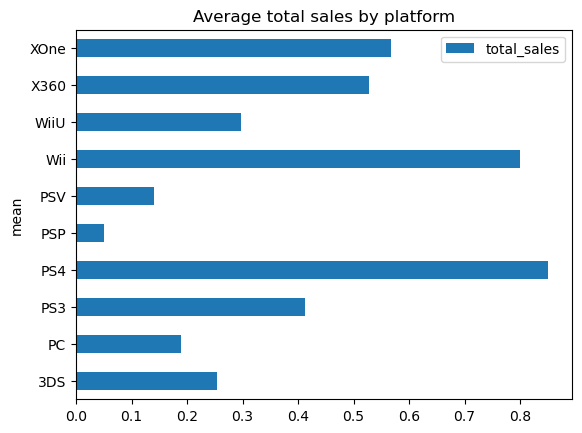

In [52]:
same_games.pivot_table(index='platform', values='total_sales', aggfunc='mean').plot(kind='barh', 
                                        title='Average total sales by platform', ylabel='mean')
plt.show()


When taking a look at average total sales of the same games across all platforms, PS4 still has the highest average sales, however, Wii is now a close competitor. From this, I can conclude that these games were popular on Wii and PS4, and, while they were available on other platforms, they were not as popular and therefore did not generate as much money. XOne, X360, and PS3 also had fairly high average sales for these games.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

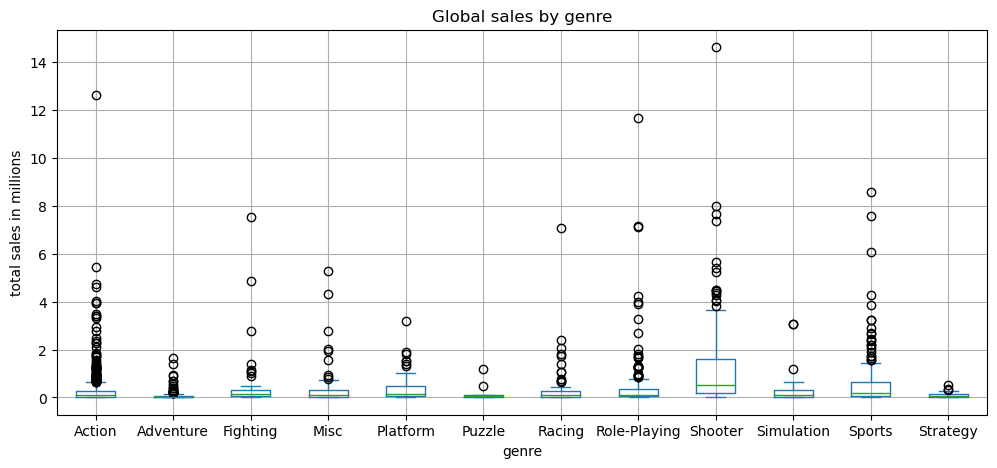

In [53]:
df_filtered.plot(kind='box', column='total_sales', by='genre', xlabel='genre', ylabel='total sales in millions', grid=True, figsize=(12,5))
plt.title('Global sales by genre')
plt.show()

<Axes: title={'center': 'Correlation of genre and total sales for PS4'}, xlabel='total sales in millions', ylabel='genre'>

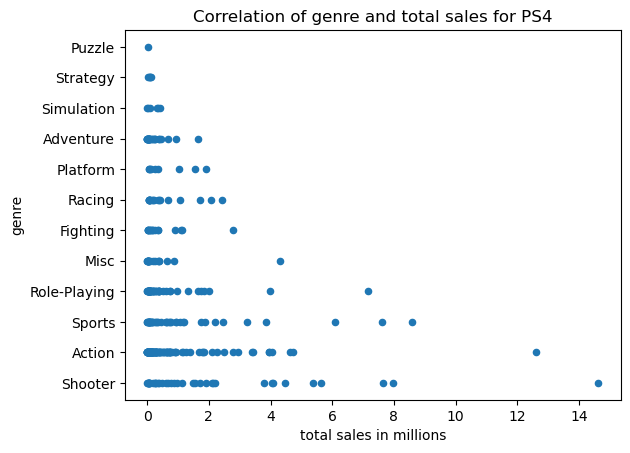

In [54]:
ps4_df.plot(kind='scatter', x='total_sales', y='genre', xlabel='total sales in millions', ylabel='genre', title='Correlation of genre and total sales for PS4')

From the box plot and scatter plot, we can see that each genre contains outliers. The highest selling genre is 'shooter' with 'sports' and 'action' both following closely. The lowest selling genre is either 'puzzle' or 'strategy'. It appears the highest selling genres also have the most amount of games while the lowest selling genres don't have many games. This could be because of their popularity/demand or lack their of for new games in that particular genre. However, no generalizations/statements can be made for why these genres are more protiable than others.

### Step 4. Create a user profile for each region

User profiles reflect sales from 2014 to 2016.

In [69]:
df_filtered['na_sales'].describe()

count    1689.000000
mean        0.168182
std         0.446134
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         6.030000
Name: na_sales, dtype: float64

Game sales in North America have an average of around .17 million dollars. Around 25% (~422 games) of games, had 0 dollars in sales. The second quartile(the median), indicated by 50%, shows .02 million dollars in sales while the third quartile shows .12 million dollars in sales. From this information, we can conclude that half of the games had sales of .02 million dollars or less and 75% of the games had sales of .12 million dollars or less. Finally, the maximum sales a game reached in North America was 6.03 million dollars.

In [68]:
df_filtered['eu_sales'].describe()

count    1689.000000
mean        0.160261
std         0.466846
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         6.310000
Name: eu_sales, dtype: float64

Games sales in Europe had a very similar average to that of North America of around .16 million dollars. Around 25% (~422 games) of games had 0 dollars in sales. The second (the median) and third quartiles are also very similar to those of North America with .02 million and .12 million respectively. From this, we can conclude that half of the games had sales of .02 million dollars or less and 75% of the games had sales of .12 million dollars or less.The maxiumum sales a game reached in Europe was 6.31 million dollars.

In [63]:
df_filtered['jp_sales'].describe()

count    1689.000000
mean        0.055115
std         0.211513
min         0.000000
25%         0.000000
50%         0.010000
75%         0.040000
max         3.180000
Name: jp_sales, dtype: float64

Game sales in Japan were overall much lower than the other two regions. The average game sales is around .055 million dollars. Around 25% of games (422 games) had 0 dollars in sales. The second quartiles (median) shows .01 million dollars in sales and the third quartile shows .04 million dollars in sales. From this we can conclude that half the games had sales of .01 million dollars or less while 75% of games had sales of .04 million dollars or less. The highest grossing game in Japan had 3.18 million dollars in sales.

A possible reason for lower overall sales could be a difference in population between the regions, video game popularity, access to video games, etc, however, there is no information to determine the exact reasoning behind lower sales.

#### For each region (NA, EU, JP), determine the top five platforms. Describe variations in their market shares from region to region.


In order to find the top five platforms per region, I will group by platform and then find the average sales per platform. I am determining "top" platform based on sales because the goal of this project is to gather information to predict future sales in order to develop a marketing strategy.

In [99]:
na_top_platforms = df_filtered.groupby('platform')['na_sales'].mean()
na_top_platforms.sort_values(ascending=False).head()

platform
XOne    0.356447
WiiU    0.265205
PS4     0.262261
X360    0.254955
Wii     0.189091
Name: na_sales, dtype: float64

The top five platforms in North America from 2014-2016, based on sales, are, in order from most sales to least: XOne, WiiU, PS4, X360, and Wii. 

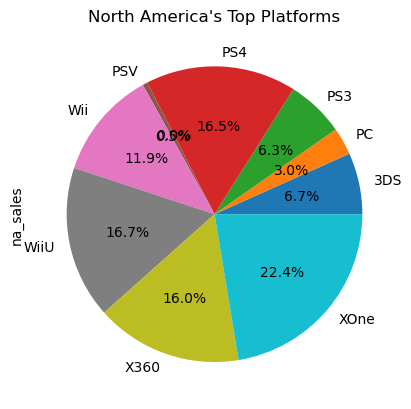

In [81]:
#creating a pie chart to represent market share of each plaform for NA, I have chose to include all platforms
#not just the top 5 in order to compare from region to region
na_top_platforms.plot(kind='pie', labels=na_top_platforms.index, autopct='%1.1f%%')
plt.title('North America\'s Top Platforms')
plt.show()

The pie graph represents the market share of each platform in North America. XOne, the top platform in NA makes up 22.4% of the market, the next highest platform, WiiU makes up 16.7%, PS4 makes up 16.5%, X360 makes up 16% and Wii makes up 11.9%. 

In [100]:
eu_top_platforms = df_filtered.groupby('platform')['eu_sales'].mean()
eu_top_platforms.sort_values(ascending=False).head()

platform
PS4     0.345851
Wii     0.235455
XOne    0.202851
WiiU    0.180137
X360    0.139550
Name: eu_sales, dtype: float64

The top five platforms in Europe from 2014-2016, based on sales, are, in order from most sales to least: PS4, Wii, XOne, WiiU, and X360.

The top five platforms in Europe are the same as those in North America just with a different from most sales to least.

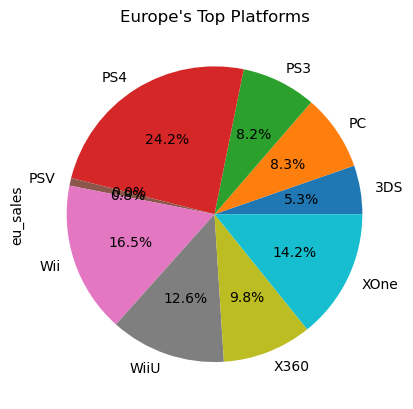

In [92]:
#creating a pie chart to represent market share of each plaform for Europe, I have chose to include all platforms
#not just the top 5 in order to compare from region to region
eu_top_platforms.plot(kind='pie', labels=eu_top_platforms.index, autopct='%1.1f%%')
plt.title('Europe\'s Top Platforms')
plt.show()

The pie graph represents the market share of each platform in Europe. The highest selling platform, PS4 makes up almost one fourth, 24.2%, of the market. The next highest selling platform, Wii, makes up 16.5%, XOne makes up 14.2%, WiiU makes up 12.6%, and X360 makes up 9.8%.

As stated prior, the top platforms (though in a different order) in Europe are the same as those in North America. In both regions, the platform with the highest market share makes up almost one fourth of the market. The platforms in following the top selling platform in each region also have similar percentages of the market share.

The console with the lowest market share in both EU and NA is PSV with close to 0%.

In [101]:
jp_top_platforms = df_filtered.groupby('platform')['jp_sales'].mean()
jp_top_platforms.sort_values(ascending=False).head()

platform
3DS     0.208679
WiiU    0.100137
PS3     0.051233
PSV     0.049288
PS4     0.039947
Name: jp_sales, dtype: float64

The top five platforms in Japan from 2014-2016, based on sales, are, in order from most sales to least: 3DS, WiiU, PS3, PSV, and PS4.

Japan's top five platforms vary from those of Europe and North America though there is some overlap (PS4 and WiiU)

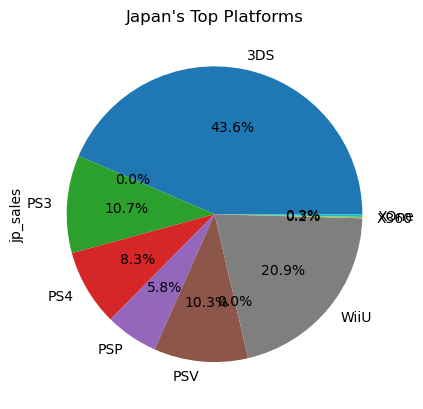

In [102]:
#creating a pie chart to represent market share of each plaform for Japan, I have chose to include all platforms
#not just the top 5 in order to compare from region to region
jp_top_platforms.plot(kind='pie', labels=jp_top_platforms.index, autopct='%1.1f%%')
plt.title('Japan\'s Top Platforms')
plt.show()

The pie graph represents the market share of each platform in Japan. 3DS holds the greatest market share at 43.6%, dominating the Japanese market. This is the highest market share by anyone platform amongst all three regions. The next highest selling platform in Japan, WiiU also hold a significant share at 20.9%. PS3, PSV, and PS4 each make up 10.7%, 10.3%,and 8.3% of the market respectively. Unlike in Europe or NA where PSV is barely visible on the graph, PSV appears to hold a semi-significant market share in Japan. Conversely, XOne and X360 are barely visible with close to 0% market share in Japan despite their popularity in Europe and North America.

#### For each region (NA, EU, JP), determine the top five genres. Explain the difference

For this analysis, similar to the analysis of platforms, "top" is defined as most profitable due to the nature and goal of this project.

In [98]:
#checking most profitable genres by grouping by genre and then finding the average sales for the specific region
na_top_genres = df_filtered.groupby('genre')['na_sales'].mean()
na_top_genres.sort_values(ascending=False).head()

genre
Shooter         0.617344
Sports          0.286522
Fighting        0.207167
Platform        0.178684
Role-Playing    0.151448
Name: na_sales, dtype: float64

Top five genres based on sales from 2014-2016 in North America are Shooter, Sports, Fighting, Platform, and Role-Playing with.

In [103]:
#checking most profitable genres by grouping by genre and then finding the average sales for the specific region
eu_top_genres = df_filtered.groupby('genre')['eu_sales'].mean()
eu_top_genres.sort_values(ascending=False).head()

genre
Shooter       0.511875
Sports        0.284037
Racing        0.204783
Platform      0.178947
Simulation    0.165909
Name: eu_sales, dtype: float64

Top five genres based on sales from 2014-2016 in Europe are Shooter, Sports, Racing, Platform, and Simulation.

In [108]:
#checking most profitable genres by grouping by genre and then finding the average sales for the specific region
jp_top_genres = df_filtered.groupby('genre')['jp_sales'].mean()
jp_top_genres.sort_values(ascending=False).head()

genre
Role-Playing    0.140995
Fighting        0.106167
Platform        0.070789
Puzzle          0.066429
Simulation      0.052500
Name: jp_sales, dtype: float64

Top five genres based on sales from 2014-2016 in Japan are Role-Playing, Fighting, Platform, Puzzle and Simulation.

Comparing regions: Top genres based on sales vary from region to region. Shooter and Sports are both top two in NA and Europe but are not in Japan's top 5. Platform games are in all three regions' top 5 with 4th highest in Europe and NA and 3rd highest in Japan. Simulation games are popular in both EU and Japan. The two regions with the most similar top genres are Europe and NA which was also true when analyzing top platforms.

#### For each region (NA, EU, JP), determine do ESRB ratings affect sales in individual regions?

To determine if ESRB ratings affect sales, I will compare sales for each rating with other ratings/sales in that region along with the relation between sales and ratings in other regions. Since I have replaced missing values in the rating column with 0, I will be disregarding rating '0' for all regions since all it indicated is games with missing ratings.

T = Teen

E10+ = Everyone 10 and up

E = Everyone

M = Mature (17+)

definitions for rating come from https://www.internetmatters.org/resources/video-games-age-ratings-explained/#:~:text=E%2010%2B%20–%20Everyone%20aged%2010,RP%20–%20Rating%20Pending

It is also important to note that prices for an individual game were not included in the dataset, therefore, we can not be sure if a higher average sales indicate a higher priced game or more games sold. 

In [112]:
#checked for total sales by rating
na_rating = df_filtered.groupby('rating')['na_sales'].mean()
na_rating.sort_values()

rating
0       0.086409
T       0.143727
E10+    0.179622
E       0.231689
M       0.363849
Name: na_sales, dtype: float64

Sales differ by ESRB ratings in North America. The highest selling rating is M and the lowest is T with E and E10+ falling in the middle. To conclude, video games rated "Mature" made up the most sales in North America in comparison to the three other rating categories.

In [106]:
#checked for total sales by rating
eu_rating = df_filtered.groupby('rating')['eu_sales'].mean()
eu_rating.sort_values()

rating
0       0.078705
T       0.125720
E10+    0.141405
E       0.265114
M       0.352604
Name: eu_sales, dtype: float64

Sales differ by ESRB ratings in Europe. The highest selling rating is M and the lowest is T with E and E10+ falling in the middle. To conclude, video games rated "Mature" made up the most sales in Europe in comparison to the three other rating categories. Though actual sale numbers differ, this follows the pattern in North America.

In [107]:
#checked for total sales by rating
jp_rating = df_filtered.groupby('rating')['jp_sales'].mean()
jp_rating.sort_values()

rating
E10+    0.024108
M       0.030226
E       0.040822
T       0.054539
0       0.075968
Name: jp_sales, dtype: float64

Sales differ by ESRB ratings in Japan. The highest selling rating is T and the lowest is E10+ with E and M falling in the middle. To conclude, video games rated "Teen" made up the most sales in Japan in comparison to the three other rating categories. This analysis greatly differs from patterns in Europe and North America.

Comparing regions: Though Europe and North American sales differ, the overall popularity of each rating has a simialr pattern with "Mature" games having the highest sales and "Teen" with the lowest. In Japan, however, "Teen" rated games have the highest sales while games rated "Everyone 10+" have the lowest sales.

Overall, it is clear that sales differ depending on the rating of the game. Therefore, I conclude that ESRB rating are a factor affecting sales. The reasoning behind this varies and there is no definite answer, but possible reasons include different access to different games in each region and a difference in gamer-demographic from region to region.

### Step 5. Test the following hypotheses:

#### Average user ratings of the Xbox One and PC platforms are the same.

**HO:** "Average user ratings of the Xbox One and PC platforms are the same."


**HA:** "Average of the Xbox One and PC platforms are not the same."

In [126]:
#creating new dataframes by filtering based on null hypothesis
avg_xone = df_filtered[df_filtered['platform']== 'XOne']['user_score']
avg_pc = df_filtered[df_filtered['platform']== 'PC']['user_score']

#running test
results = st.ttest_ind(avg_xone, avg_pc)
alpha = .05 
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject HO')
else:
    print('Cannot reject H0')

p-value: 0.32800030965842586
Cannot reject H0


Set alpha to .05 since it is a standard threshold.

After running the ttest, and seeing that the p-value is > alpha, we cannot reject the hypothesis that average useer ratings of the Xbox One and PC platforms are the same. This doesn't, however, prove that they are the same, we just cannot reject the hypothesis.

#### Average user ratings for the Action and Sports genres are different.

**HO:** "Average user ratings for the Action and Sports genres are the same."


**HA:** "Average user ratings for the Action and Sports genres are not the same."

In [129]:
#creating new dataframes by filtering based on null hypothesis
avg_action = df_filtered[df_filtered['genre']== 'Action']['user_score']
avg_sports = df_filtered[df_filtered['genre']== 'Sports']['user_score']

#running test
results = st.ttest_ind(avg_action, avg_sports)
alpha = .05 
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject HO')
else:
    print('Cannot reject H0')

p-value: 0.003247568418715718
Reject HO


Set alpha to .05 since it is a standard threshold.


Based on t-test, I reject the null hypothesis that average user ratings for the Action and Sports games are the same. 

### Step 6: Conclusion

#### Conclusion:

The bulk of the analysis of the DataFrame focused on years 2014-2016 with the motive to provide accurate and relevant information on video game sales in order to forecast 2017 sales and create a marketing campaign.

From this analysis there are several takeaways that can be used to inform the marketing campaign and predict future sales.

There has been an overall drop in video games sales (at least those present in this DataFrame) from 2014 to 2016. Despite this, video games still generate a lot of revenue. In particular, games released on the platform PS4 had the highest total sales for this time period. Other top platforms in terms of sales include XOne, X360, Wii, WiiU, and PS3, however PS4 leads in sales substantially.

When analyzing PS4 specifically, I found that critic/user scores have little to no correlation on total sales. Since PS4 sales were so high, I wanted to see if I could delve deeper into the reasoning behind this. Perhaps PS4 offered a specialty game that otehr platforms do not and therefore brought in a substantially larger amount of sales. However, this was not the case. When comparing games that were available on all platforms, PS4 still lead in sales.

Sales also varied by genre. According to my box plots, Shooter and Sports seemed to be the most profitable.

I also took a look at how profitable each platform and genre was by region (North America, Europe, and Japan) along with how ESRB ratings affect sales. Here, I found that patterns between North America and Europe were quite similar when it came to platform profitability (top 5 platforms were the same for both regions) and fairly simialr when it came to profitablity by genre. Japan differed greatly to the other two regions when it came to profitable platforms and genres. Also, Japan overall had far less sales than the other two regions, representing a lower market share. 

In each region, sales did differ by ESRB rating.

Lastly, I tested two hypotheses average user ratings across two platforms and across two genres.

I am not a marketing expert, but I believe the data analysis included throughout this project will help to guide marketing and sales forecasting for the upcoming year. I have provided information on the most profitable platform overall as well as the most profitable platform by region. I have also provided the same information based on genre. I have also determined that critic and user scores do not tend to affect sales.

From this information, the marketing team should be able to distinguish which games/genres and on what platform to promote in each region.